In [61]:
import pandas as pd

In [62]:
customer=pd.read_csv('ecommerce_customer_behavior_dataset.csv')

In [63]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

In [7]:
customer.isnull().sum()

Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64

In [8]:
customer.duplicated().sum()

np.int64(0)

In [9]:
customer['Date']=pd.to_datetime(customer['Date'])

In [64]:
import seaborn as sns

In [65]:
from sklearn.preprocessing import LabelEncoder
encoding=['Gender','Payment_Method','City','Device_Type','Product_Category']
le=LabelEncoder()
for i in encoding:
    customer[i]=le.fit_transform(customer[i])
    print(customer)

        Order_ID Customer_ID        Date  Age  Gender      City  \
0     ORD_001337  CUST_01337  2023-01-01   27       0     Bursa   
1     ORD_004885  CUST_04885  2023-01-01   42       1     Konya   
2     ORD_004507  CUST_04507  2023-01-01   43       0    Ankara   
3     ORD_000645  CUST_00645  2023-01-01   32       1  Istanbul   
4     ORD_000690  CUST_00690  2023-01-01   40       0  Istanbul   
...          ...         ...         ...  ...     ...       ...   
4995  ORD_001048  CUST_01048  2024-03-26   18       0     Izmir   
4996  ORD_001051  CUST_01051  2024-03-26   27       1     Adana   
4997  ORD_003543  CUST_03543  2024-03-26   45       0   Antalya   
4998  ORD_004443  CUST_04443  2024-03-26   41       0  Istanbul   
4999  ORD_000902  CUST_00902  2024-03-26   30       0     Konya   

     Product_Category  Unit_Price  Quantity  Discount_Amount  Total_Amount  \
0                Toys       54.28         1             0.00         54.28   
1                Toys      244.90      

<Axes: >

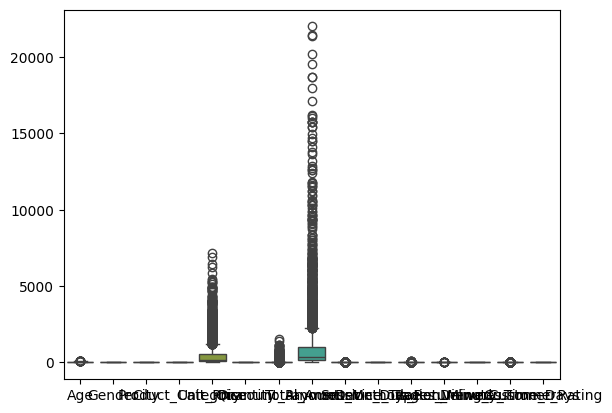

In [68]:
sns.boxplot(data=customer)

In [69]:
x=['Date', 'Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount', 'Session_Duration_Minutes', 'Pages_Viewed','Delivery_Time_Days', 'Customer_Rating','Gender','Payment_Method','City','Device_Type','Product_Category']
for i in x:
    q1 = customer[i].quantile(0.25)
    q3 = customer[i].quantile(0.75)
    iqr = q3 - q1   
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = customer[(customer[i] < lower_bound) | (customer[i] > upper_bound)]
    percentage_outliers = (len(outliers) / len(customer)) * 100
    if percentage_outliers<=5:
        outliers_handled= customer[~((customer[i] < lower_bound) | (customer[i] > upper_bound))]
        print(f'Outliers handled for {i}, percentage of outliers: {percentage_outliers:.2f}%')
    print(f"Percentage of outliers in {i}: {percentage_outliers:.2f}%")

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [70]:
#EDA
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_7492\13549595.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(customer['Payment_Method'].value_counts(),palette='pastel')


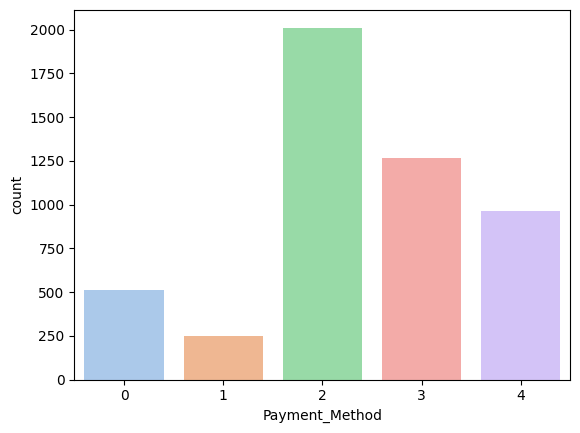

In [15]:
sns.barplot(customer['Payment_Method'].value_counts(),palette='pastel')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7492\1682275617.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(customer['City'].value_counts(),palette='pastel')


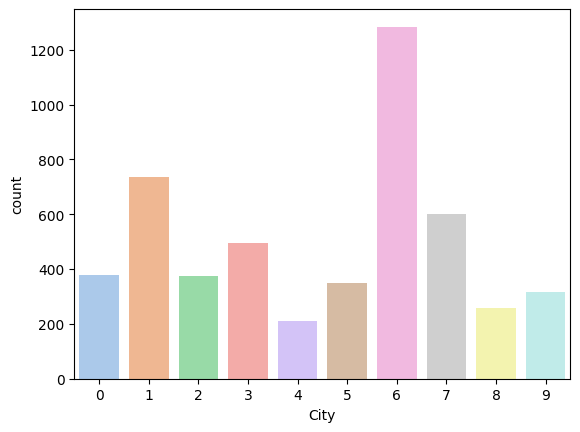

In [16]:
sns.barplot(customer['City'].value_counts(),palette='pastel')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7492\4271544661.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(customer['Is_Returning_Customer'].value_counts(),palette='pastel')


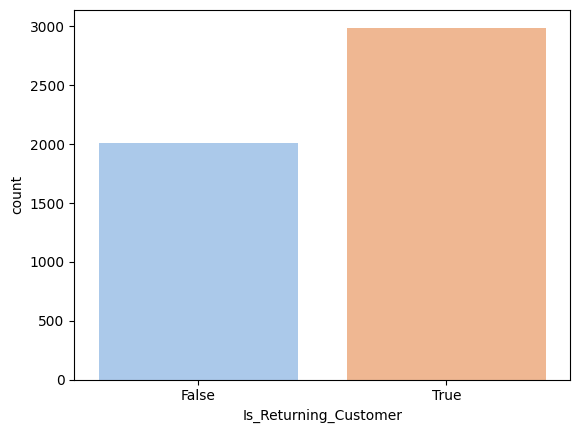

<Figure size 1000x800 with 0 Axes>

In [17]:
sns.barplot(customer['Is_Returning_Customer'].value_counts(),palette='pastel')
plt.figure(figsize=(10,8))
plt.show()

this belongs to returns where customer return their products
the count of customers returning products  are more 

C:\Users\HP\AppData\Local\Temp\ipykernel_7492\3105284556.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(customer['Product_Category'].value_counts(),palette='pastel')


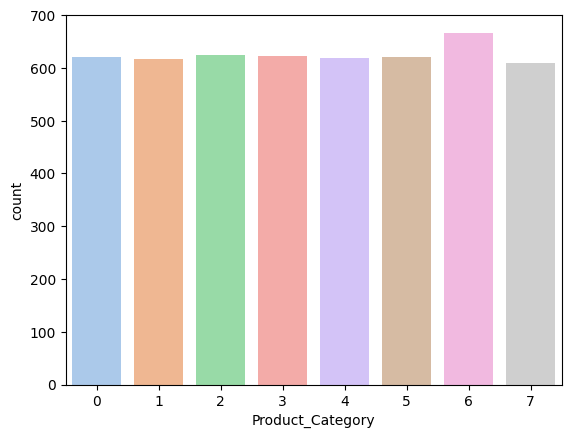

In [18]:
sns.barplot(customer['Product_Category'].value_counts(),palette='pastel')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

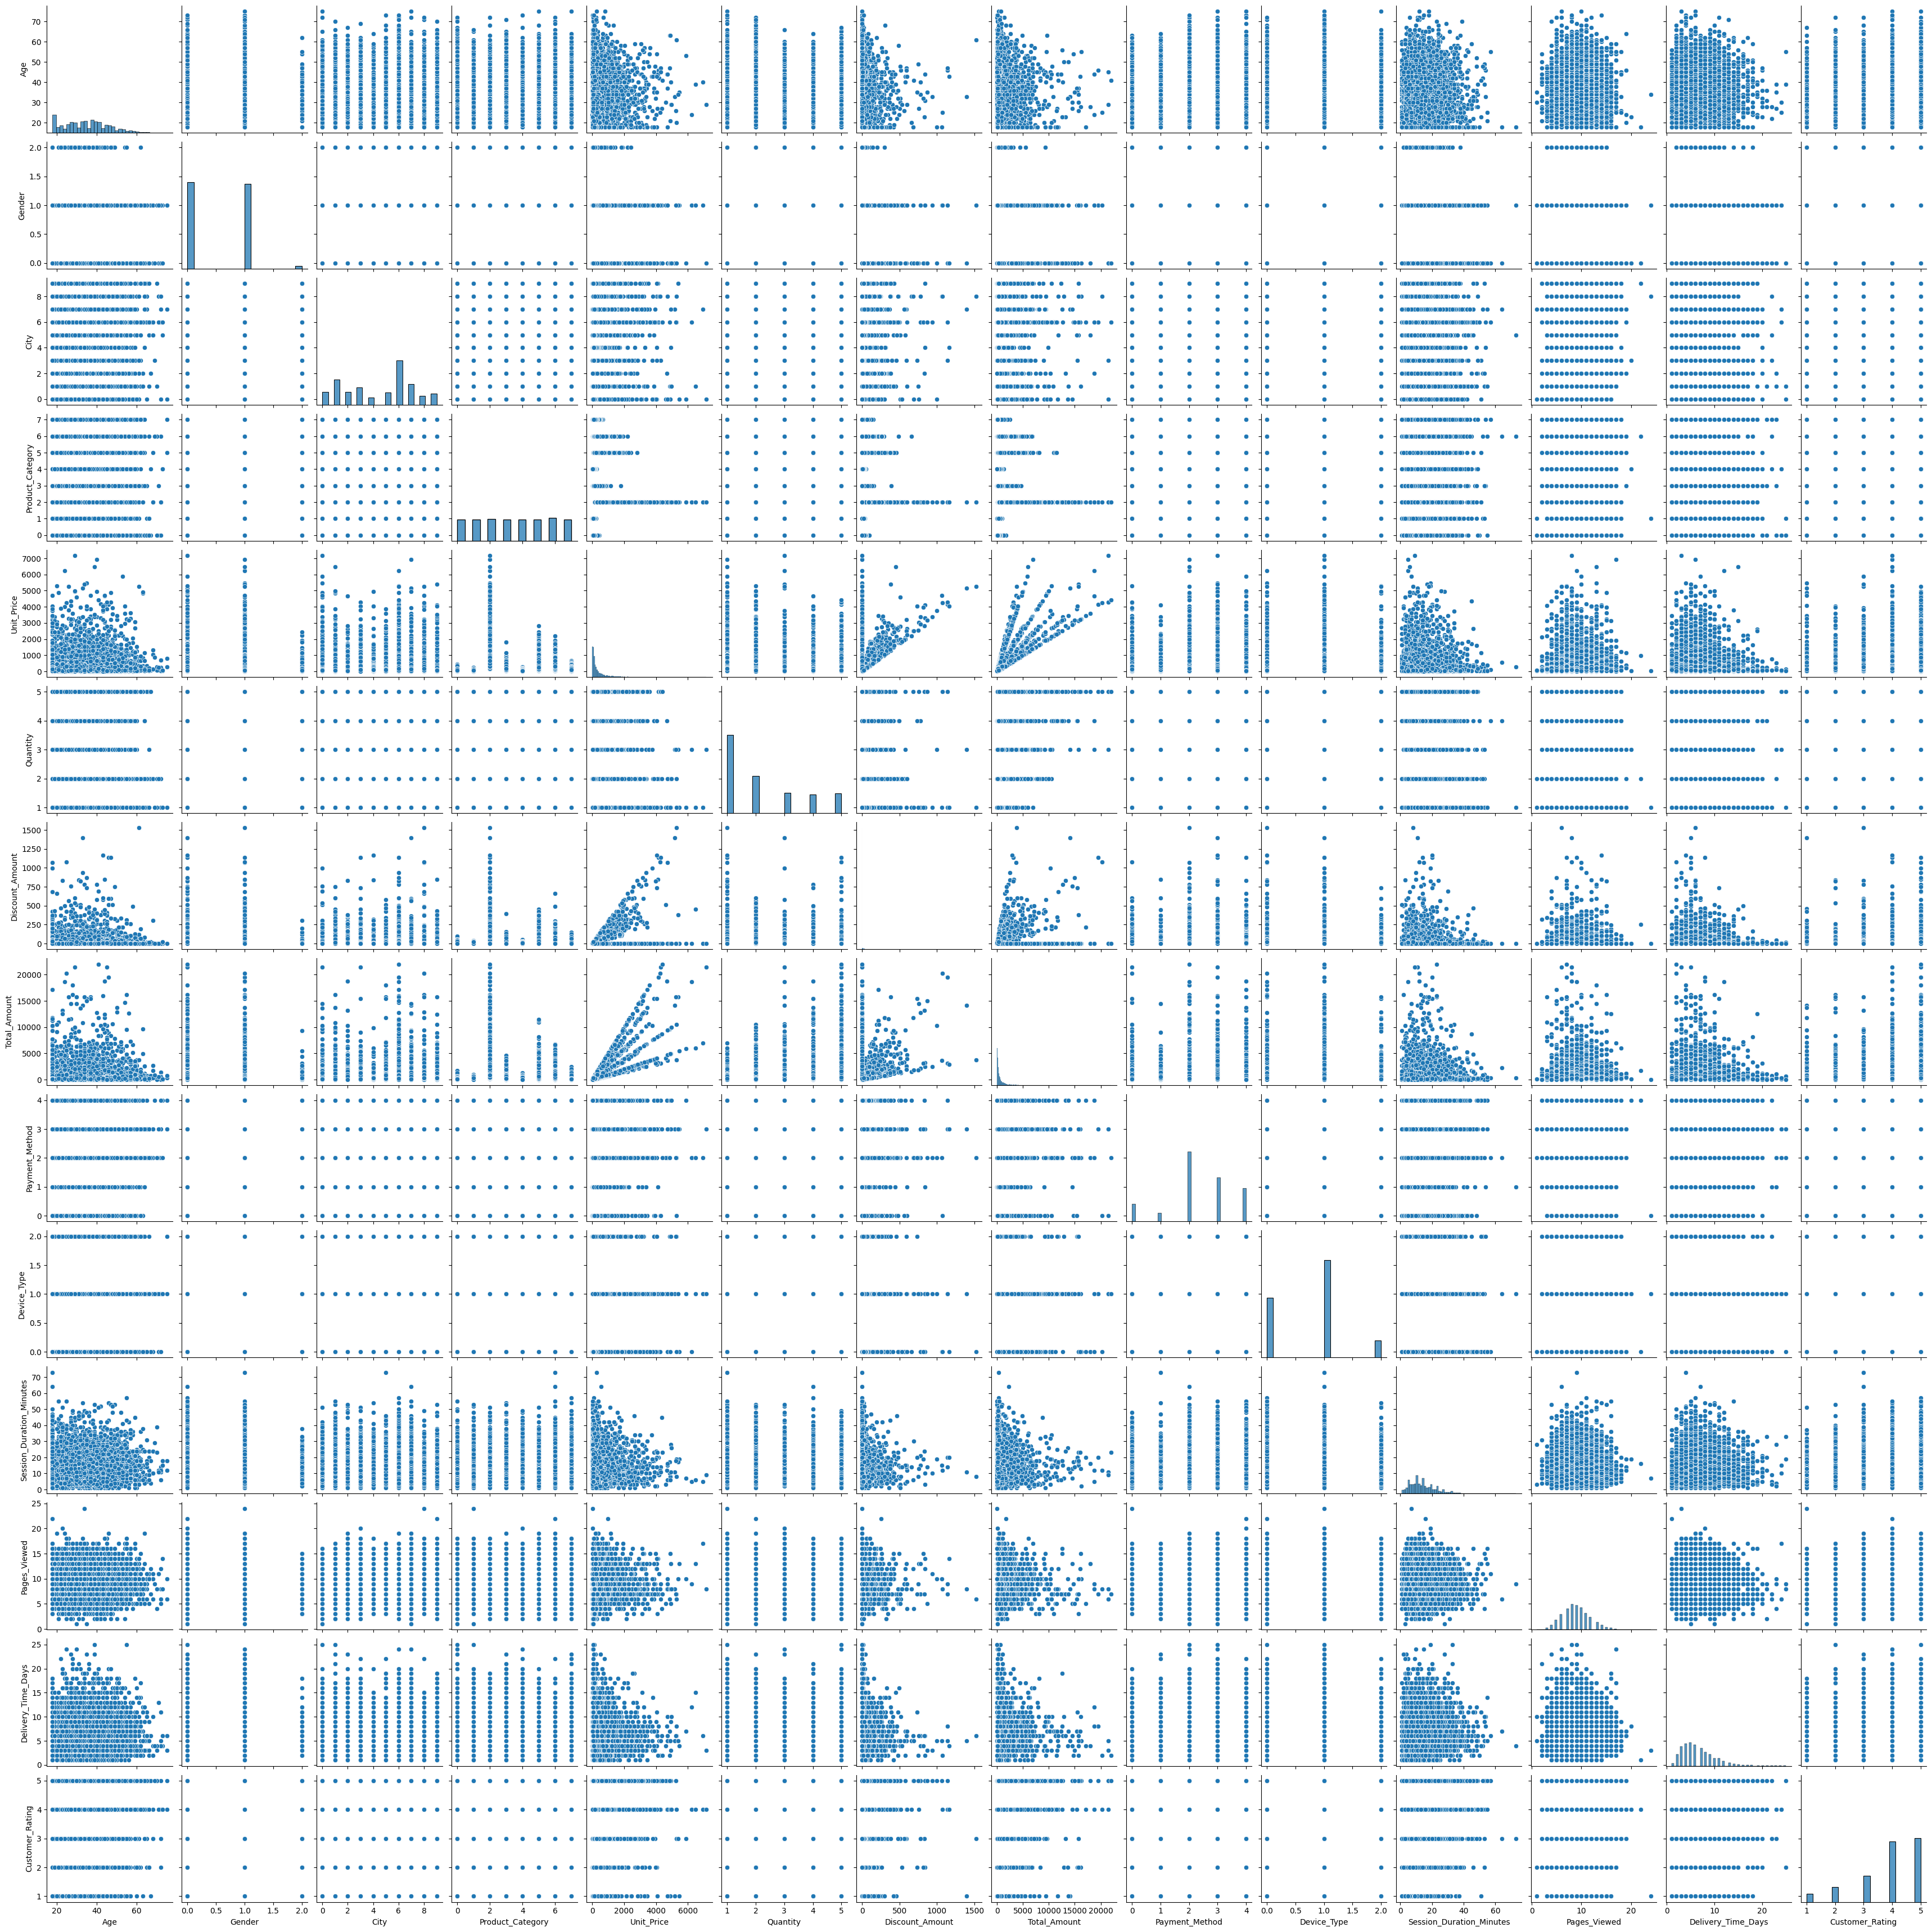

In [19]:
pair=customer.select_dtypes(include=['number'])
sns.pairplot(pair,palette='pastel')
plt.show()

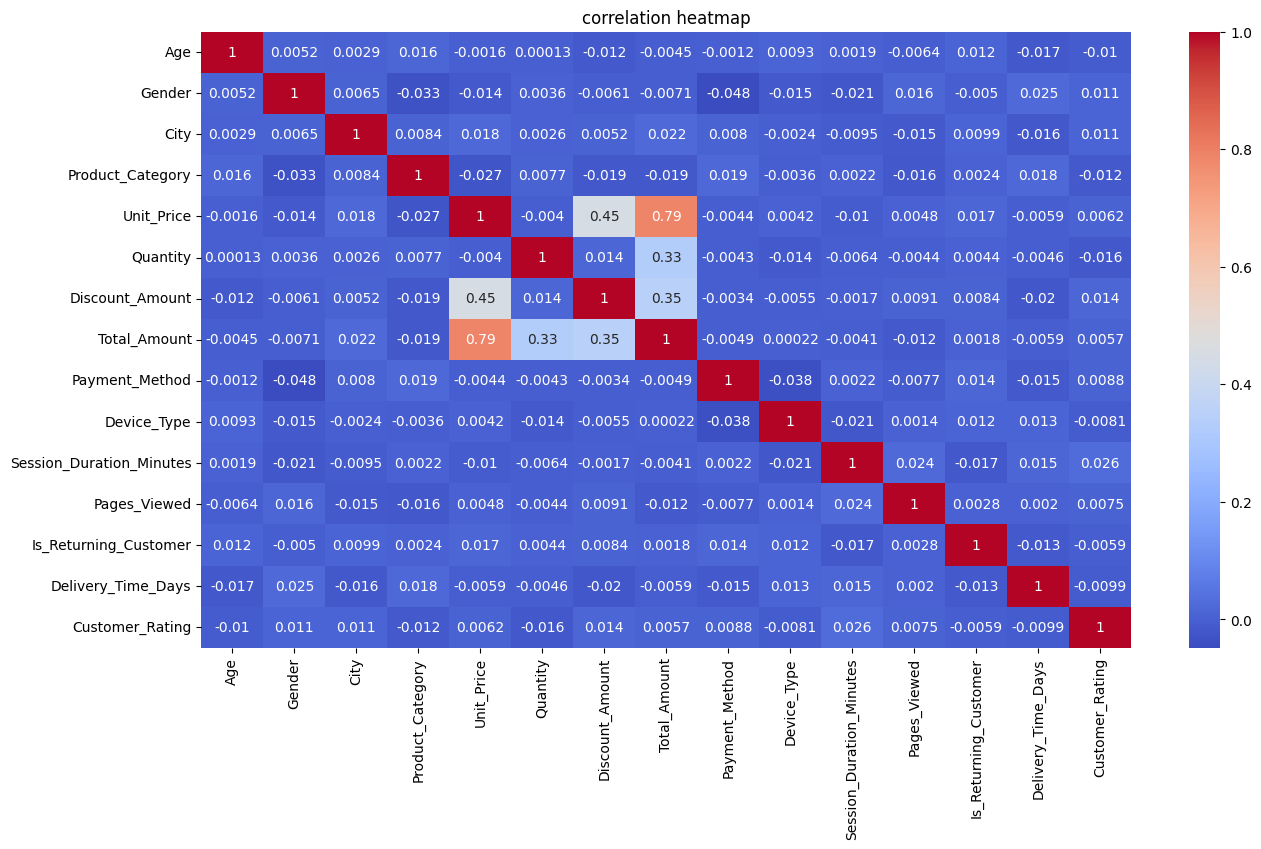

In [20]:
corr=customer.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

In [71]:
x=customer[['Age','Unit_Price','Quantity','Discount_Amount','Total_Amount','Session_Duration_Minutes','Pages_Viewed','Delivery_Time_Days','Customer_Rating','Gender','Payment_Method','City','Device_Type','Product_Category']]
x

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating,Gender,Payment_Method,City,Device_Type,Product_Category
0,27,54.28,1,0.00,54.28,4,14,8,5,0,3,3,1,7
1,42,244.90,1,0.00,244.90,11,3,3,3,1,2,9,1,7
2,43,48.15,5,0.00,240.75,7,8,5,2,0,2,1,1,4
3,32,804.06,1,229.28,574.78,8,10,1,4,1,2,6,1,2
4,40,755.61,5,0.00,3778.05,21,10,7,4,0,1,6,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18,130.35,1,27.30,103.05,17,10,9,1,0,0,7,1,0
4996,27,71.55,1,0.00,71.55,13,9,6,4,1,3,0,1,0
4997,45,39.38,1,5.27,34.11,38,10,5,4,0,4,2,1,4
4998,41,171.19,1,0.00,171.19,20,12,5,4,0,2,6,1,3


In [72]:
y=customer['Is_Returning_Customer']
y

0        True
1        True
2        True
3       False
4        True
        ...  
4995    False
4996     True
4997     True
4998     True
4999     True
Name: Is_Returning_Customer, Length: 5000, dtype: bool

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=38)

In [24]:
x_train.shape

(4000, 14)

In [25]:
x_test.shape

(1000, 14)

In [26]:
y_train.shape

(4000,)

In [27]:
y_test.shape

(1000,)

In [28]:
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression()

In [29]:
m1.fit(x_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
y_pred=m1.predict(x_test)
print(y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report
matrix=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
r1=recall_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
classify=classification_report(y_test,y_pred)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

In [32]:
acc

0.594

In [33]:
r1

1.0

In [34]:
pre

0.594

In [35]:
f1

0.7452948557089084

In [36]:
print(classify)

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       406
        True       0.59      1.00      0.75       594

    accuracy                           0.59      1000
   macro avg       0.30      0.50      0.37      1000
weighted avg       0.35      0.59      0.44      1000



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
m1=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [38]:
m1.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
y_pred=m1.predict(x_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

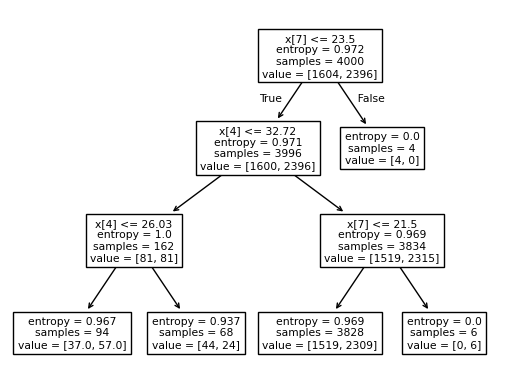

In [40]:
tree.plot_tree(m1);

In [41]:
predict=m1.predict(x_test)
pd.Series(predict).value_counts()

True     983
False     17
Name: count, dtype: int64

In [42]:
predict.shape

(1000,)

In [43]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.595

In [44]:
classify=classification_report(y_test,y_pred)
print(classify)

              precision    recall  f1-score   support

       False       0.53      0.02      0.04       406
        True       0.60      0.99      0.74       594

    accuracy                           0.59      1000
   macro avg       0.56      0.50      0.39      1000
weighted avg       0.57      0.59      0.46      1000



In [45]:
y_test.shape

(1000,)

In [46]:
m2=DecisionTreeClassifier(criterion='gini',max_depth=3)
m2


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [47]:
m2.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
y_pred=m2.predict(x_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

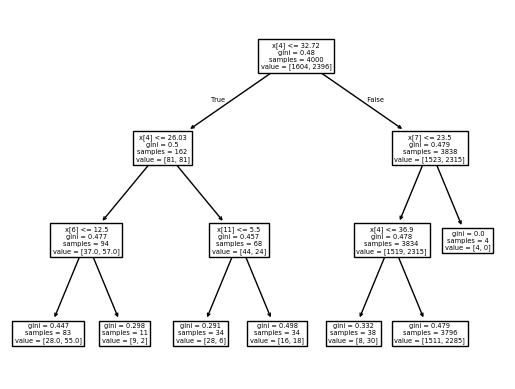

In [49]:
tree.plot_tree(m2)
plt.show()

In [50]:
predict=m2.predict(x_test)
pd.Series(predict).value_counts()

True     986
False     14
Name: count, dtype: int64

In [51]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.596

In [52]:
classify=classification_report(y_test,y_pred)
print(classify)

              precision    recall  f1-score   support

       False       0.57      0.02      0.04       406
        True       0.60      0.99      0.74       594

    accuracy                           0.60      1000
   macro avg       0.58      0.50      0.39      1000
weighted avg       0.59      0.60      0.46      1000



RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier
m3=RandomForestClassifier(criterion='entropy')
m3.fit(x_train,y_train)



,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
y_pred=m3.predict(x_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False,  True,
        True,  True,

In [55]:
predict=m3.predict(x_test)
pd.Series(predict).value_counts()

True     846
False    154
Name: count, dtype: int64

In [56]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.546

In [57]:
classify=classification_report(y_test,y_pred)
print(classify)

              precision    recall  f1-score   support

       False       0.34      0.13      0.19       406
        True       0.58      0.83      0.68       594

    accuracy                           0.55      1000
   macro avg       0.46      0.48      0.44      1000
weighted avg       0.49      0.55      0.48      1000



In [58]:
m4=RandomForestClassifier(criterion='gini')
m4.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
y_pred=m4.predict(x_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,

In [74]:
predict=m4.predict(x_test)
pd.Series(predict).value_counts()

True     876
False    124
Name: count, dtype: int64

KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [90]:
knn.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [91]:
y_pred=knn.predict(x_test)

In [92]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.534

In [93]:
new=[[25,1,2,3,150.0,2,10.0,290.0,0,1,15,5,2,4]]
prediction=knn.predict(new)
print([prediction][0])

[False]


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
